array([[<Axes: title={'center': 'Age'}>]], dtype=object)

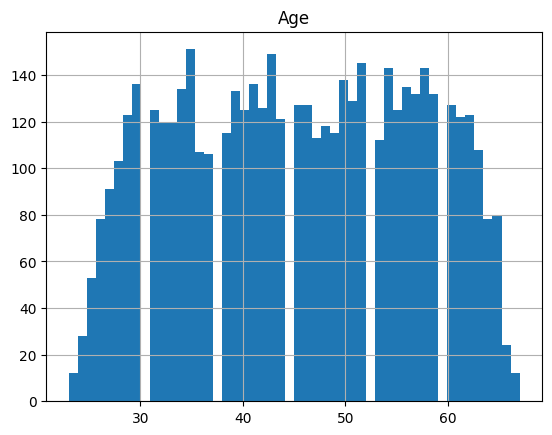

In [92]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.hist(column='Age', bins=50)

In [93]:
def train_and_test_knn(X, y, neighboors=5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    clf = KNeighborsClassifier(n_neighbors=neighboors)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

X = df[['Education', 'Income']]
y = df['Family']
accuracy_1 = train_and_test_knn(X, y)
print(f'Accuracy for Education, Income -> Family: {accuracy_1}')

X = df[['Age', 'Income']]
y = df['Personal Loan']
accuracy_2 = train_and_test_knn(X, y)
print(f'Accuracy for Age, Income -> Personal Loan: {accuracy_2}')

X = df[['Age', 'Experience']]
y = df['Income']
accuracy_3 = train_and_test_knn(X, y)
print(f'Accuracy for Age, Experience -> Income: {accuracy_3}')

X = df[['Age', 'Income']]
y = df['CreditCard']
accuracy_4 = train_and_test_knn(X, y)
print(f'Accuracy for Age, Income -> CreditCard: {accuracy_4}')

features = df.drop(columns=[ 'ID', 'ZIP Code', 'Online'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
y = df['Personal Loan']
accuracy_5 = train_and_test_knn(X_pca, y)
print(f'Accuracy for Scaled Data -> Personal Loan: {accuracy_5}')

Accuracy for Education, Income -> Family: 0.31133333333333335
Accuracy for Age, Income -> Personal Loan: 0.9013333333333333
Accuracy for Age, Experience -> Income: 0.009333333333333334
Accuracy for Age, Income -> CreditCard: 0.6486666666666666
Accuracy for Scaled Data -> Personal Loan: 0.9453333333333334


## Which values are the best

The age, income / Personal loa seems to be the best with the fewest values.

This makes sense because I would think people with a lower income would l loans

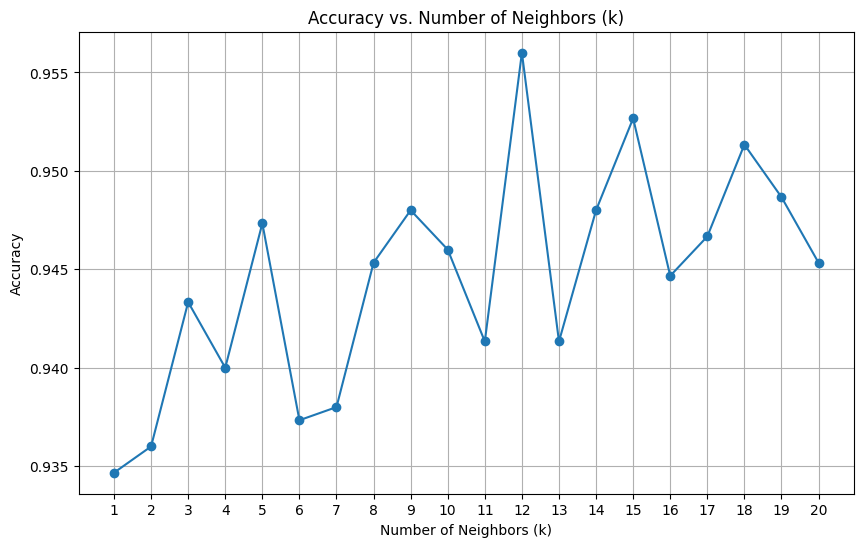

In [94]:
features = df.drop(columns=['ID', 'ZIP Code', 'Online'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
y = df['Personal Loan']



def train_and_test_knn(X, y, n_neighbors=5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

k_values = range(1, 21)
accuracies = []

# Calculate accuracy for each k
for k in k_values:
    accuracy = train_and_test_knn(X_pca, y, n_neighbors=k)
    accuracies.append(accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [95]:
def plot_knn_heatmap(X, y, k=5, resolution=100):
    """
    Plots a k-NN heatmap for 2D data.

    Parameters:
    - X: numpy array of shape (n_samples, 2), the input features.
    - y: numpy array of shape (n_samples,), the target labels.
    - k: int, number of neighbors to use in k-NN.
    - resolution: int, the resolution of the heatmap grid.
    """
    # Check that X has exactly two features
    if X.shape[1] != 2:
        raise ValueError("This function only supports 2D data (two features).")

    # Create color maps for plotting
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA', '#AAFFFF', '#FFAAFF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF'])

    # Create an instance of KNeighborsClassifier and fit the data
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)

    # Determine the boundaries of the plot
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    # Generate a grid of points with the given resolution
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution),
                         np.linspace(y_min, y_max, resolution))

    # Use the classifier to predict the class at each grid point
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

    # Plot the original data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)

    # Set plot boundaries and title
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"k-NN Classification (k = {k})")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


In [96]:
X = df[['Age', 'Income']]
y = df['Personal Loan']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the KNN classifier with the best number of neighbors
best_k = 5  # Based on previous analysis
knn_clf = KNeighborsClassifier(n_neighbors=best_k)
knn_clf.fit(X_train_scaled, y_train)
x_verify = [[41, 160], [35, 40], [60, 64], [53, 120]]
y_verify = [1, 0, 0, 1]
# Scale the verification data
x_verify_scaled = scaler.transform(x_verify)

# Predict using the trained model
y_pred_verify = knn_clf.predict(x_verify_scaled)

# Calculate accuracy
accuracy_verify = accuracy_score(y_verify, y_pred_verify)
print(f'Accuracy on verification data: {accuracy_verify}')
# Predict on test data
y_pred_test = knn_clf.predict(X_test_scaled)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Accuracy on test data: {accuracy_test}')


Accuracy on verification data: 0.75
Accuracy on test data: 0.8873333333333333


/home/m/dev/ai/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [97]:
df['Has_Mortgage'] = df['Mortgage'].apply(lambda x: 1 if x > 0 else 0)
df['Has_Mortgage']

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: Has_Mortgage, Length: 5000, dtype: int64